In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import streamlit as st
import plotly.figure_factory as ff
import plotly.graph_objects as go


In [2]:
df=pd.read_csv("C:\\Users\\SAI\\machine-learning-prediction using Streamlit\\healthcare-stroke-prediction\\healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
df.dropna(how='any',inplace=True)

In [7]:
df.shape

(4909, 12)

In [8]:
df[df['id']==51676]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [9]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df[df['smoking_status']== 'Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
31,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
38,47306,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
67,72366,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [15]:
print(df[['age']].min())
print(df[['age']].max().max())
df.age.min()

age    0.08
dtype: float64
82.0


0.08

#### label encoding manually for respective columns

In [16]:
cleanup_nums = {"gender":     {"Male": 0, "Female": 1, "Other":2},
                "work_type": {'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4},
                "Residence_type":{'Urban': 0, 'Rural': 1},
                "smoking_status": {'formerly smoked': 0, 'never smoked': 1, 'smokes':2, 'Unknown':3},
              "ever_married":{'No': 0, 'Yes': 1} }

In [17]:
df=df.replace(cleanup_nums)


In [18]:
df['smoking_status'].unique()

array([0, 1, 2, 3], dtype=int64)

In [19]:
## another type of 

""""df["gender1"] = df["gender"].astype('category')
df.dtypes
df["gender1"] = df["gender1"].cat.codes
df.head()"""

'"df["gender1"] = df["gender"].astype(\'category\')\ndf.dtypes\ndf["gender1"] = df["gender1"].cat.codes\ndf.head()'

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
X=df[df.columns[1:-1]]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,0,0,228.69,36.6,0
2,0,80.0,0,1,1,0,1,105.92,32.5,1
3,1,49.0,0,0,1,0,0,171.23,34.4,2
4,1,79.0,1,0,1,1,1,174.12,24.0,1
5,0,81.0,0,0,1,0,0,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,3,1,103.08,18.6,3
5106,1,81.0,0,0,1,1,0,125.20,40.0,1
5107,1,35.0,0,0,1,1,1,82.99,30.6,1
5108,0,51.0,0,0,1,0,1,166.29,25.6,0


In [22]:
y=df[df.columns[-2]]
y

0       0
2       1
3       2
4       1
5       0
       ..
5104    3
5106    1
5107    1
5108    0
5109    3
Name: smoking_status, Length: 4909, dtype: int64

#### train-test-split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3289 entries, 4904 to 916
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3289 non-null   int64  
 1   age                3289 non-null   float64
 2   hypertension       3289 non-null   int64  
 3   heart_disease      3289 non-null   int64  
 4   ever_married       3289 non-null   int64  
 5   work_type          3289 non-null   int64  
 6   Residence_type     3289 non-null   int64  
 7   avg_glucose_level  3289 non-null   float64
 8   bmi                3289 non-null   float64
 9   smoking_status     3289 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 282.6 KB


### model selection

In [26]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)


C:\Users\SAI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions=logr.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       276
           1       0.95      0.99      0.97       610
           2       0.83      0.70      0.76       231
           3       0.90      0.94      0.92       503

    accuracy                           0.93      1620
   macro avg       0.92      0.89      0.90      1620
weighted avg       0.92      0.93      0.92      1620



In [29]:
from sklearn .metrics import accuracy_score
score=accuracy_score(predictions,y_test)
score

0.9259259259259259

In [30]:
import pickle
pickle_out=open("models/healthcare-stroke-prediction_Logistic.pkl",'wb')
pickle.dump(logr,pickle_out)
pickle_out.close()

In [31]:
from sklearn.svm import SVC



In [32]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       276
           1       0.43      0.96      0.60       610
           2       0.00      0.00      0.00       231
           3       0.88      0.48      0.62       503

    accuracy                           0.51      1620
   macro avg       0.33      0.36      0.30      1620
weighted avg       0.44      0.51      0.42      1620



C:\Users\SAI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import pickle
pickle_out=open("models/healthcare-stroke-prediction_SVC.pkl",'wb')
pickle.dump(svc,pickle_out)
pickle_out.close()

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions_dtree=dtree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       610
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       503

    accuracy                           1.00      1620
   macro avg       1.00      1.00      1.00      1620
weighted avg       1.00      1.00      1.00      1620



#### Visualization

In [36]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='count'>

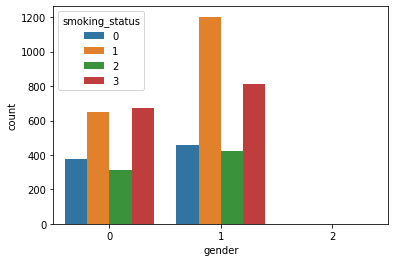

In [37]:
sns.countplot(hue='smoking_status',x='gender',data=df)

In [38]:
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

In [39]:
init_notebook_mode(connected = True) 

In [40]:
df['smoking_status'].unique()

array([0, 1, 2, 3], dtype=int64)

In [41]:
"""
['formerly smoked', 'never smoked', 'smokes', 'Unknown']

"""

"\n['formerly smoked', 'never smoked', 'smokes', 'Unknown']\n\n"

In [42]:
df.smoking_status.count()

4909

In [43]:
df[['smoking_status']]==0

,smoking_status
0,True
2,False
3,False
4,False
5,True
...,...
5104,False
5106,False
5107,False
5108,True


In [44]:
df_info=df.describe()

In [45]:
df_info

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,0.590548,42.865374,0.091872,0.049501,0.652679,0.842534,0.492768,105.305150,28.893237,1.583826,0.042575
std,20995.098457,0.492197,22.555115,0.288875,0.216934,0.476167,1.124057,0.499999,44.424341,7.854067,1.090146,0.201917
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,18605.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.070000,23.500000,1.000000,0.000000
50%,37608.000000,1.000000,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.680000,28.100000,1.000000,0.000000
75%,55220.000000,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.570000,33.100000,3.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [46]:
df_info.columns[1:-1]

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [47]:
df_info.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [48]:
df_info.gender.values

array([4.90900000e+03, 5.90547973e-01, 4.92196942e-01, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00])

In [49]:
df.smoking_status.values

array([0, 1, 2, ..., 1, 0, 3], dtype=int64)

In [50]:
v=df[df['smoking_status']==0].count() 
v.values[0]

837

In [51]:
print(df[df['smoking_status']==0].count().values[0])
print(df[df['smoking_status']==1].count().values[0])

837
1852


## write df

In [131]:
df.to_csv("converted dataframe.csv")

In [132]:
df_write=pd.read_csv("converted dataframe.csv")

In [137]:
df_write.dropna(how='any',inplace=True)
df_write.drop(columns='Unnamed: 0',inplace=True)

In [138]:
df_write.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.6 KB


In [ ]:
df_write

##### matplotlib

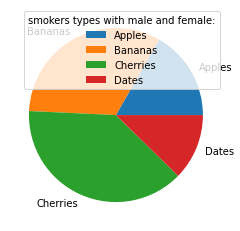

In [52]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([34,66,78,25])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels = mylabels)
plt.legend(title = "smokers types with male and female:")
plt.show() 

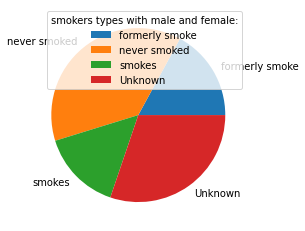

In [53]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([df[df['smoking_status']==0].count().values[0],df[df['smoking_status']==1].count().values[0],df[df['smoking_status']==2].count().values[0],df[df['smoking_status']==3].count().values[0]])
mylabels = ["formerly smoke", "never smoked", "smokes", "Unknown"]

plt.pie(y, labels = mylabels)
plt.legend(title = "smokers types with male and female:")
plt.show() 

#### using plotly

In [156]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`

fig = px.pie(df, values='gender', names='smoking_status',title='Population of smoking',
            
            )
fig.show()

In [55]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df_tips = px.data.tips()
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [56]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df_tips = px.data.tips()
fig = px.pie(df_tips, values='tip', names='day')
fig.show()

In [57]:
import plotly.express as px
df_country = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(df_country, values='pop', names='country',
             title='Population of American continent',
             hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
df_all_country=px.data.gapminder()
print(df_all_country)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

          country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  

#### using altair library



In [58]:
# Importing altair
import altair as alt
# Import data object from vega_datasets
from vega_datasets import data

# Selecting the data
iris = data.iris()

# Making the Scatter Plot
alt.Chart(iris).mark_point().encode(
	# Map the sepalLength to x-axis
	x='sepalLength',
	# Map the petalLength to y-axis
	y='petalLength',
	# Map the species to shape
	shape='species'
)


alt.Chart(...)

In [59]:
# Importing altair and pandas library
import altair as alt
import pandas as pd

# Making a Pandas DataFrame
score_data = pd.DataFrame({
'Website': ['StackOverflow', 'FreeCodeCamp','GeeksForGeeks', 'MDN', 'CodeAcademy'],
    'Score': [65, 50, 99, 75, 33]
    
})

# Making the Simple Bar Chart
alt.Chart(score_data).mark_bar().encode(
	# Mapping the Website column to x-axis
	x='Website',
	# Mapping the Score column to y-axis
	y='Score'
)


alt.Chart(...)

In [60]:
# Importing altair and pandas library
import altair as alt
import pandas as pd

# Making a Pandas DataFrame
smoking_data = pd.DataFrame({
    
    'total population who smokes' : ["formerly smoke", "never smoked", "smokes", "Unknown"],
    'both male and female': np.array([df[df['smoking_status']==0].count().values[0],df[df['smoking_status']==1].count().values[0],df[df['smoking_status']==2].count().values[0],df[df['smoking_status']==3].count().values[0]])
 
})

# Making the Simple Bar Chart
alt.Chart(smoking_data).mark_bar().encode(
# Mapping the Website column to x-axis
y='total population who smokes',
# Mapping the Score column to y-axis
x='both male and female'
)

alt.Chart(...)

##### data manipulation for visulization

In [74]:
data1=pd.read_csv("C:\\Users\\SAI\\machine-learning-prediction using Streamlit\\healthcare-stroke-prediction\\healthcare-dataset-stroke-data.csv")
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [71]:
np.array([data1[data1['smoking_status']==0].count().values[0],data1[data1['smoking_status']==1].count().values[0],data1[data1['smoking_status']==2].count().values[0],data1[data1['smoking_status']==3].count().values[0]])

array([0, 0, 0, 0], dtype=int64)

In [73]:
s=np.random.randn(20, 3)
s.shape

(20, 3)

In [76]:
""">>> chart_data = pd.DataFrame(
...     np.random.randn(20, 3),
...     columns=['a', 'b', 'c'])
...
>>> st.line_chart(chart_data)
"""

">>> chart_data = pd.DataFrame(\n    np.random.randn(20, 3),\n    columns=['a', 'b', 'c'])\n\nst.line_chart(chart_data)\n"

In [110]:
#filter1 = data["Team"]=="Atlanta Hawks"
filter_male_bmi=data1['gender']=='Male'
wrt_male=data1.where(filter_male_bmi)
wrt_male_bmi=wrt_male[['bmi']]
wrt_male_bmi.shape

(5110, 1)

In [113]:
wrt_male_data=pd.DataFrame(wrt_male[['bmi']],columns=['bmi with males'])
st.line_chart(wrt_male_data)

2021-04-01 08:32:57.874 WARNING root: 
  command:

    streamlit run C:\Users\SAI\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [142]:
data_conv=pd.read_csv('converted dataframe.csv')
filter_male=data_conv['gender']==0
wrt_male=data_conv.where(filter_male)
hist_data_male = [wrt_male['bmi'],wrt_male['avg_glucose_level']]
group_labels_male = ['bmi', 'avg_glucose_level']
fig_male = ff.create_distplot(hist_data_male, group_labels_male, bin_size=[10, 25])
st.plotly_chart(fig_male, use_container_width=True)

ValueError: array must not contain infs or NaNs

In [143]:
st.bar_chart(wrt_male['bmi'])

In [144]:
data_conv['gender']==0

0        True
1        True
2       False
3       False
4        True
        ...  
4904    False
4905    False
4906    False
4907     True
4908    False
Name: gender, Length: 4909, dtype: bool

<AxesSubplot:xlabel='gender', ylabel='count'>

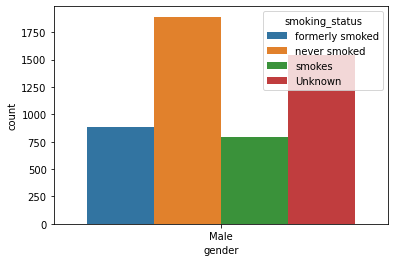

In [145]:
sns.countplot(x='gender',hue='smoking_status',data=data1)

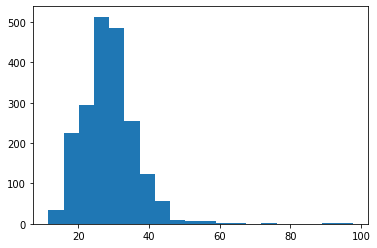

<Figure size 216x216 with 0 Axes>

In [153]:
import matplotlib.pyplot as plt
import numpy as np
arr = wrt_male['bmi']

fig, ax = plt.subplots()
ax.hist(arr, bins=20)
plt.figure(figsize=(3, 3))
st.pyplot(fig)

In [148]:
wrt_male['bmi']

0       36.6
1       32.5
2        NaN
3        NaN
4       29.0
        ... 
4904     NaN
4905     NaN
4906     NaN
4907    25.6
4908     NaN
Name: bmi, Length: 4909, dtype: float64

In [149]:
wrt_male

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,9046.0,0.0,67.0,0.0,1.0,1.0,0.0,0.0,228.69,36.6,0.0,1.0
1,2.0,31112.0,0.0,80.0,0.0,1.0,1.0,0.0,1.0,105.92,32.5,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,56669.0,0.0,81.0,0.0,0.0,1.0,0.0,0.0,186.21,29.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4907,5108.0,37544.0,0.0,51.0,0.0,0.0,1.0,0.0,1.0,166.29,25.6,0.0,0.0


In [163]:
fig = go.Figure(data1=[
go.Bar(name='Male', x=data1[['gender']=='Male'], y=np.array([data1[data1['smoking_status']==0].count().values[0],data1[data1['smoking_status']==1].count().values[0],data1[data1['smoking_status']==2].count().values[0],data1[data1['smoking_status']==3].count().values[0]])),
go.Bar(name='Female', x=data1[['gender']=='Female'], y=np.array([data1[data1['smoking_status']==0].count().values[0],data1[data1['smoking_status']==1].count().values[0],data1[data1['smoking_status']==2].count().values[0],data1[data1['smoking_status']==3].count().values[0]])),
go.Bar(name='Other', x=data1[['gender']=='Other'], y=np.array([data1[data1['smoking_status']==0].count().values[0],data1[data1['smoking_status']==1].count().values[0],data1[data1['smoking_status']==2].count().values[0],data1[data1['smoking_status']==3].count().values[0]]))])
st.plotly_chart(fig)

KeyError: False